In [1]:
import pandas as pd
from datetime import datetime
from hodler import HodlerBenchmark
import numpy as np

In [2]:
def repair_date(val):
    return datetime.strptime(val, '%b %d, %Y')

def repair_price(val):
    return float(str(val).replace(',',''))

In [3]:
def new_hodler(filename):
    df = pd.read_csv(filename)
    perv_columns = df.columns
    df['date'] = df.Date.apply(repair_date)
    df['price'] = df.Price.apply(repair_price)
    df.drop([c for c in perv_columns], axis = 1, inplace = True)
    df.sort_values(by=['date'], ascending=True, inplace = True)
    return HodlerBenchmark(df, filename)

In [4]:
# https://www.investing.com/crypto/bitcoin/btc-usd-historical-data
hodlers = []
hodlers.append(new_hodler('btc.csv'))
hodlers.append(new_hodler('eth.csv'))
hodlers.append(new_hodler('doge.csv'))

In [5]:
for h in hodlers:
    h.fit()
    print(h.name, np.median(h.df.hodl_period), np.mean(h.df.hodl_period), np.max(h.df.hodl_period))

btc.csv 85.0 247.120636550308 1236
eth.csv 246.0 391.5778019586507 1239
doge.csv 426.5 463.9719020172911 1298


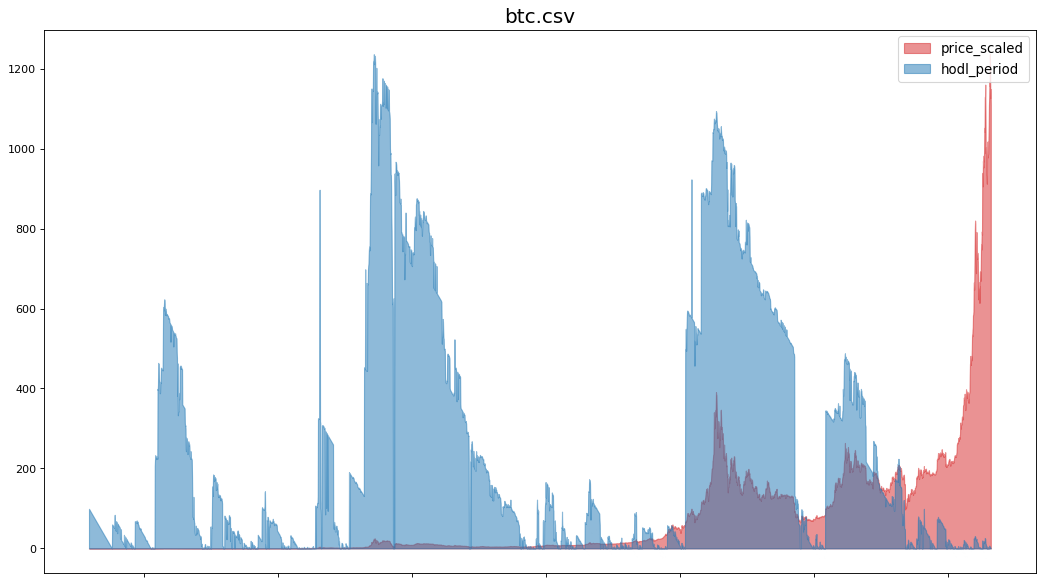

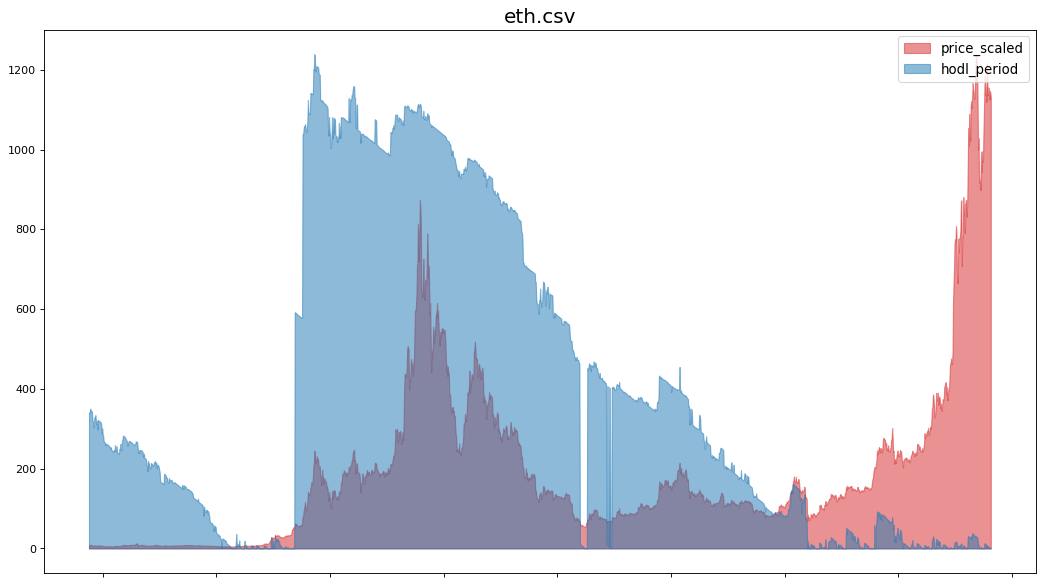

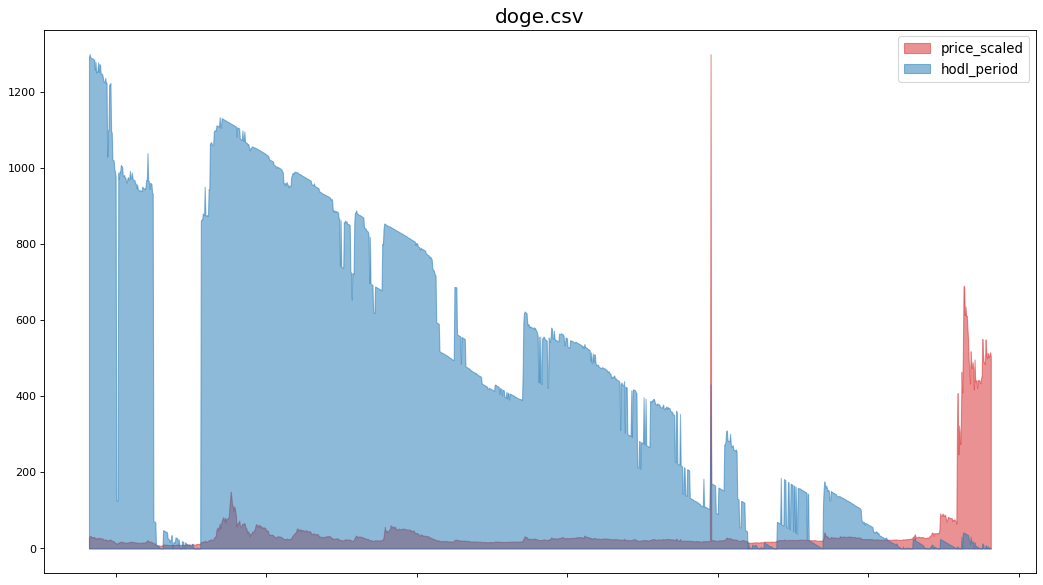

In [6]:
for h in hodlers:
    h.plot()